## Esercizio Classificazione 3



<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/disaster.jpg" width="1200">

In [52]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/twitter_train.csv'

In [53]:
df = pd.read_csv(path)
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [54]:
df.text.isnull().sum()

0

In [84]:
patterns = {
            r"UTC]": '',
            r"b'": '',
            r'\d+': '',      # rimuove digits (numeri)
            r'[^\w\s]': '',  # Remove punteggiatura e simboli ...,'@!£$%
            r'\b\w{1,2}\b':'',#remove all token less than2 characters
            r'(http|www)[^\s]+':'', # remove website
            r'\s+': ' '    # rimuove tutti i multipli spazi con uno spazio
            }

def clean_column(df, column, patterns):
    for pattern, replacement in patterns.items():
        df[column] = df[column].str.replace(pattern, replacement)
        df[column] = df[column].str.lower() # applica il lower
        df[column] = df[column].str.strip()
    return df

In [85]:
cleaned_df = clean_column(df, 'text', patterns)

In [86]:
cleaned_df

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason this earthquake may a...,1
1,4,NaN,NaN,forest fire near ronge sask canada,1
2,5,NaN,NaN,all residents asked shelter place are being no...,1
3,6,NaN,NaN,people receive wildfires evacuation orders cal...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska smok...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding bridge collapse into ...,1
7609,10870,NaN,NaN,aria_ahrary thetawniest the out control wild f...,1
7610,10871,NaN,NaN,volcano hawaii,1
7611,10872,NaN,NaN,police investigating after ebike collided with...,1


In [87]:
cleaned_df.text

0       our deeds are the reason this earthquake may a...
1                      forest fire near ronge sask canada
2       all residents asked shelter place are being no...
3       people receive wildfires evacuation orders cal...
4       just got sent this photo from ruby alaska smok...
                              ...                        
7608    two giant cranes holding bridge collapse into ...
7609    aria_ahrary thetawniest the out control wild f...
7610                                       volcano hawaii
7611    police investigating after ebike collided with...
7612    the latest more homes razed northern californi...
Name: text, Length: 7613, dtype: object

In [88]:
all_text = " ".join(row for row in cleaned_df['text'])

In [95]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
stopwords.update(['new', 'now', 'amp', 'will', 'dont'])
wordcloud = WordCloud(width = 3000, height = 2000,background_color='white',stopwords=stopwords)
wordcloud.generate(all_text)

{'there', "wouldn't", 'doing', "she'd", 'me', 'by', 'nor', 'below', "shouldn't", 'new', "doesn't", 'was', 'out', 'through', 'but', 'after', 'some', "couldn't", "he's", "they'd", "what's", 'no', 'too', 'an', 'else', "let's", 'until', 'and', "you'll", "how's", 'up', 'will', 'how', 'few', 'once', 'amp', 'would', "i'll", "aren't", "she'll", 'k', 'however', 'dont', 'why', 'during', 'our', 'yours', "we're", 'com', "mustn't", 'we', "there's", "haven't", 'while', 'am', 'only', 'did', 'if', 'like', 'of', "we'd", "you've", 'when', 'were', 'have', 'my', 'where', 'most', 'i', 'since', 'hence', 'his', 'again', 'each', 'any', "you'd", 'been', 'down', 'in', 'against', "hadn't", "hasn't", 'had', "weren't", 'yourself', "isn't", 'on', 'could', "that's", 'at', "we've", 'between', 'do', "when's", "don't", 'for', 'also', 'both', 'has', "i'd", 'here', 'very', "they've", 'be', 'he', 'what', "here's", 'all', 'under', 'are', 'her', 'further', 'she', 'it', 'www', 'with', 'otherwise', 'who', 'get', 'myself', 'so

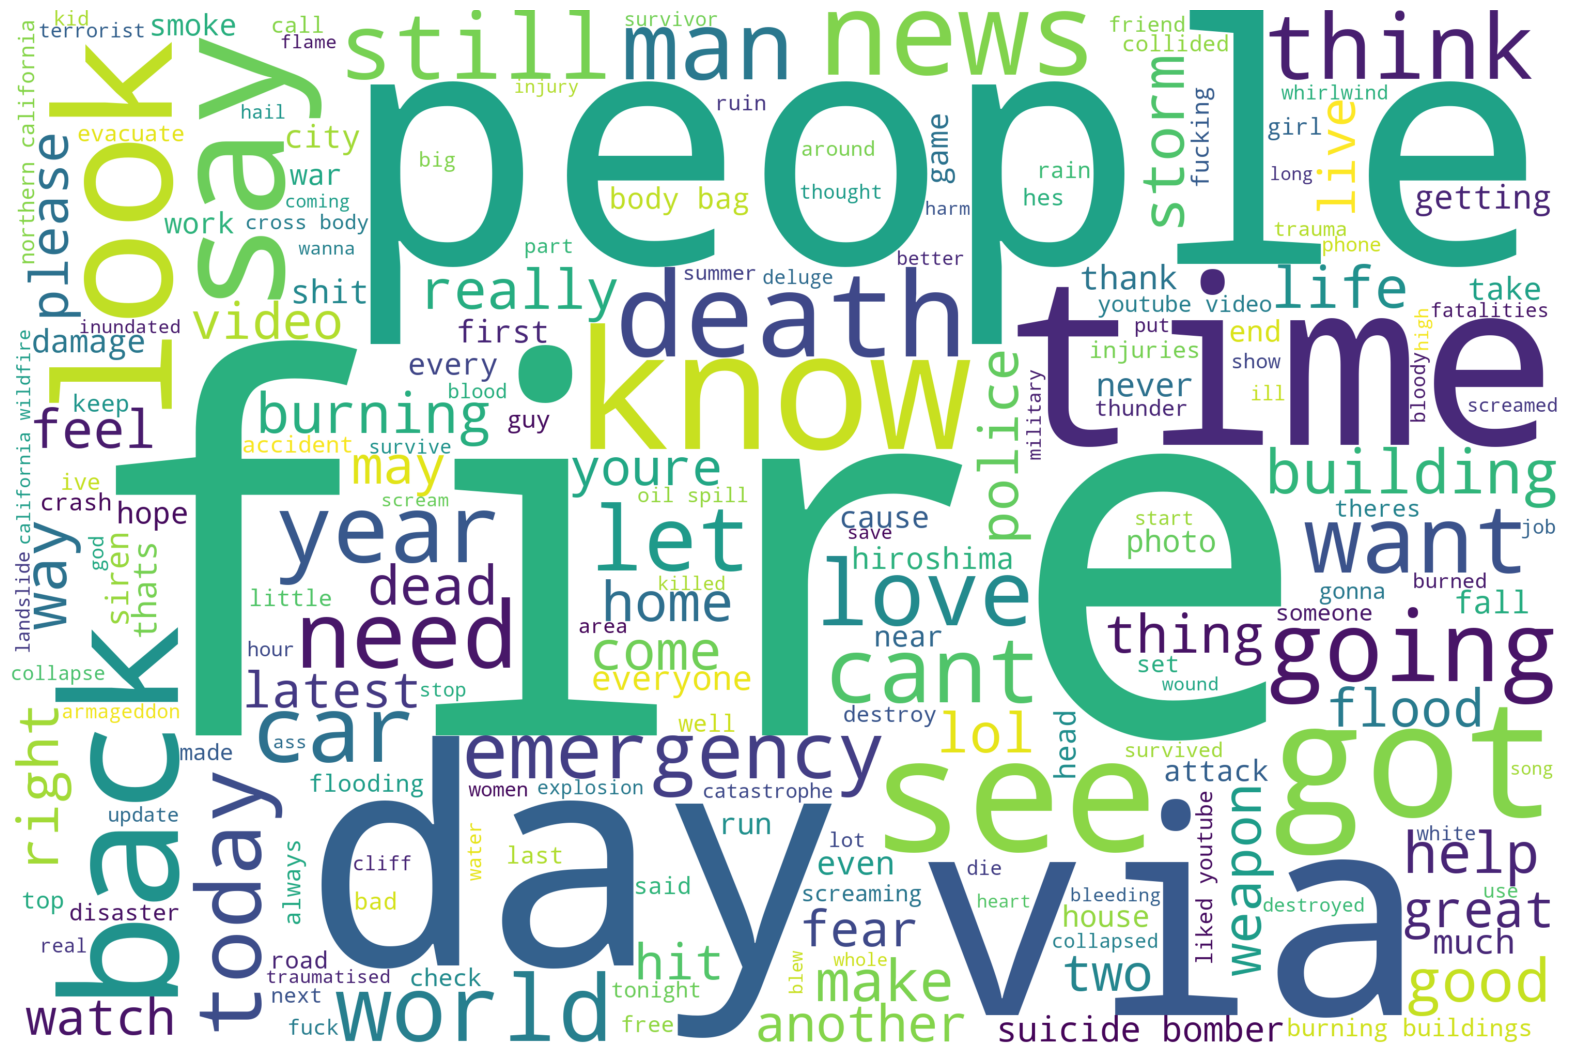

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [96]:
# Filter the text based on the class column
text_target_1 = cleaned_df.loc[cleaned_df['target'] == 1, 'text']
text_target_0 = cleaned_df.loc[cleaned_df['target'] == 0, 'text']

# Concatenate the filtered text into a single string
all_text_target_0 = " ".join(row for row in text_target_0)
all_text_target_1 = " ".join(row for row in text_target_1)

In [103]:
cleaned_df.loc[cleaned_df['target'] == 1, 'text']

0       our deeds are the reason this earthquake may a...
1                      forest fire near ronge sask canada
2       all residents asked shelter place are being no...
3       people receive wildfires evacuation orders cal...
4       just got sent this photo from ruby alaska smok...
                              ...                        
7608    two giant cranes holding bridge collapse into ...
7609    aria_ahrary thetawniest the out control wild f...
7610                                       volcano hawaii
7611    police investigating after ebike collided with...
7612    the latest more homes razed northern californi...
Name: text, Length: 3271, dtype: object

In [97]:

wordcloud0 = WordCloud(width = 3000, height = 2000,background_color='white',stopwords=stopwords)
wordcloud0.generate(all_text_target_0)

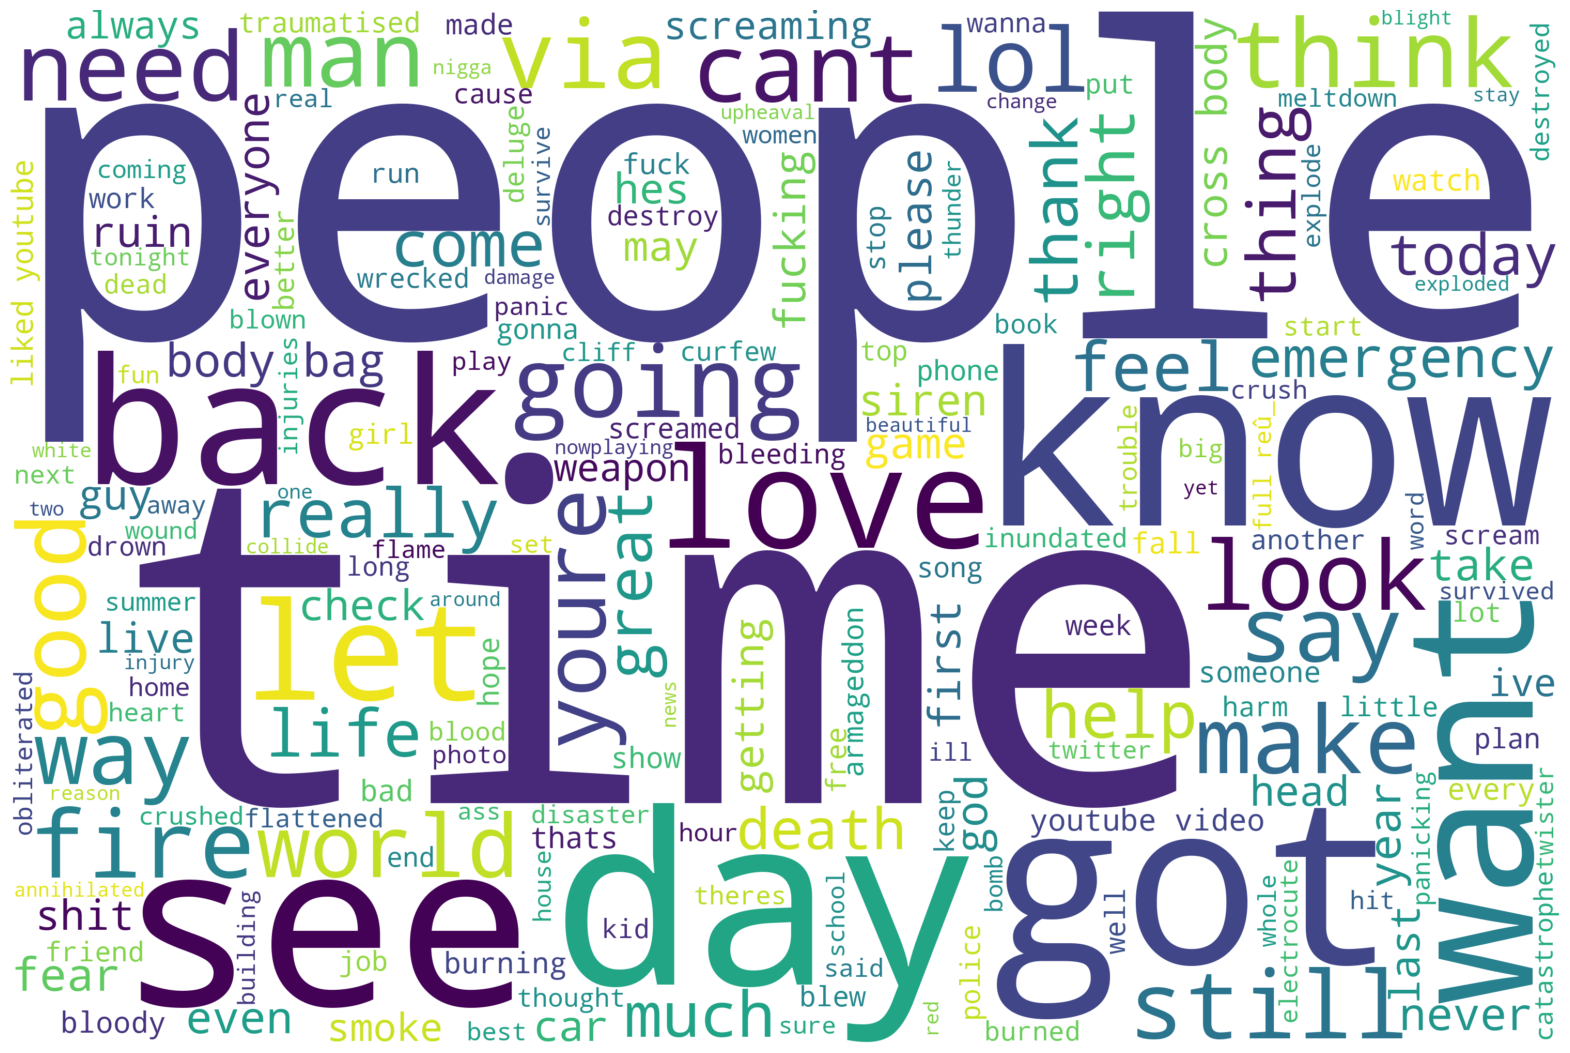

In [98]:
wordcloud.generate(all_text_target_0)
plt.figure(figsize=(20, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [93]:

wordcloud1 = WordCloud(width = 3000, height = 2000,background_color='white',stopwords=stopwords)
wordcloud1.generate(all_text_target_1)

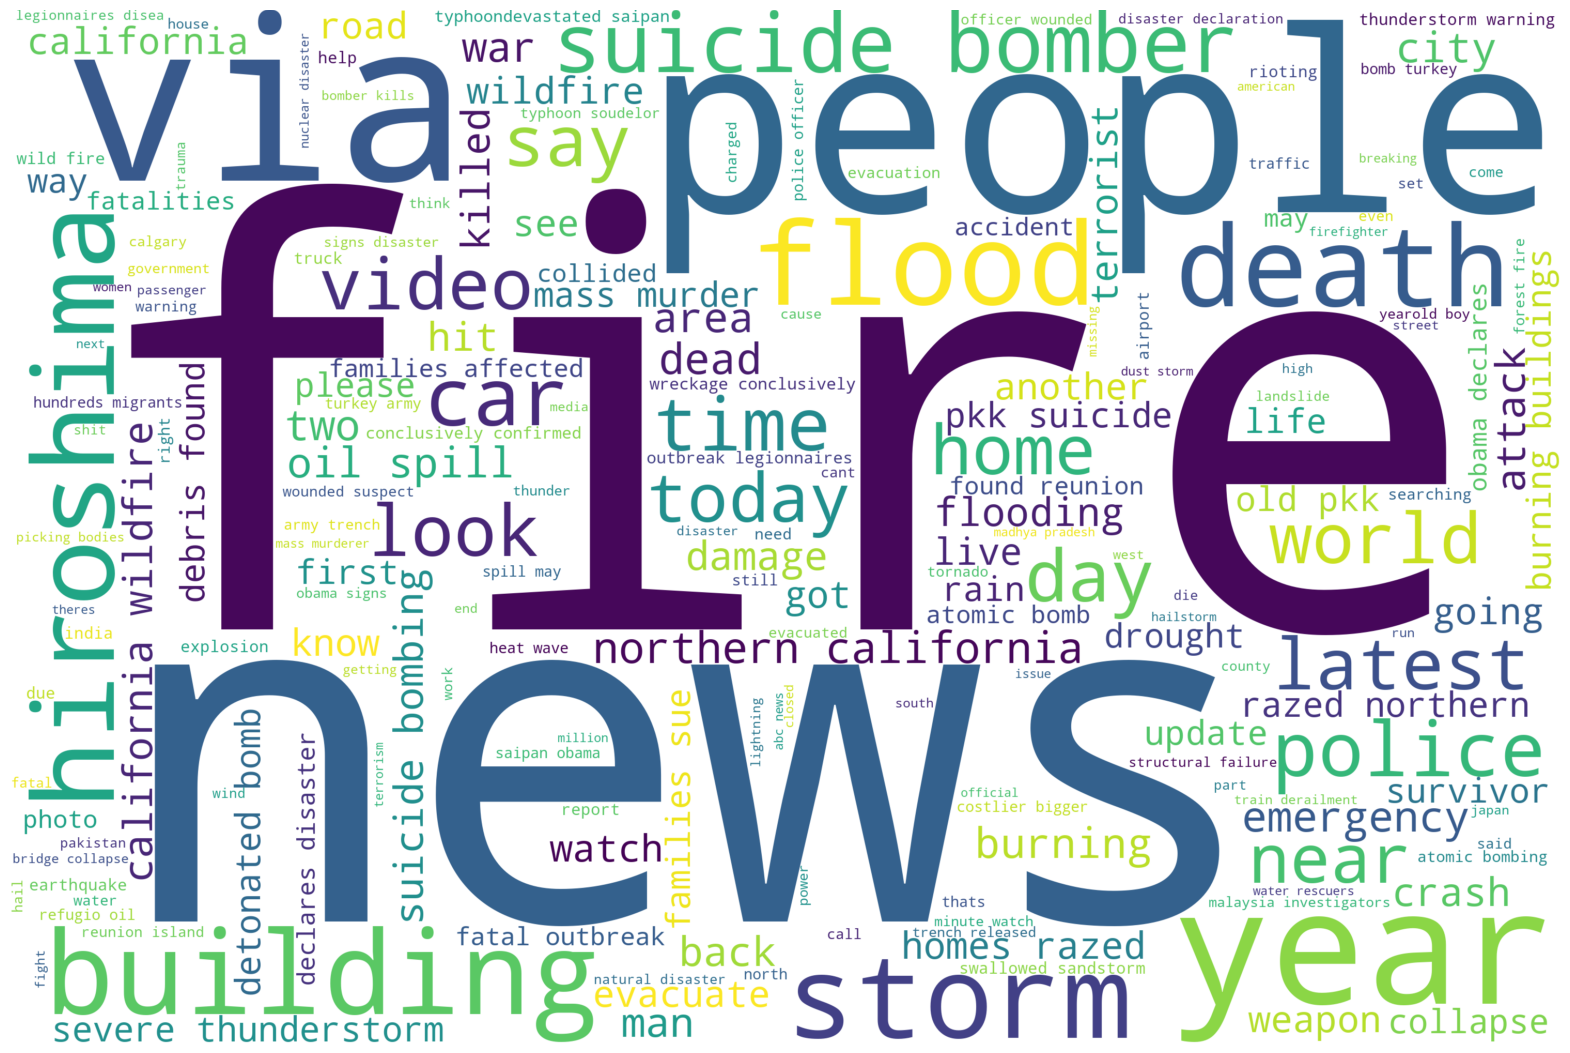

In [94]:
wordcloud.generate(all_text_target_1)
plt.figure(figsize=(20, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [105]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = CountVectorizer(max_features=3000, min_df=4, max_df=0.9)
tfidfconverter = TfidfTransformer()

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.text, df.target, 
                                                    test_size=0.25, 
                                                    random_state=667
                                                    )

In [107]:
X_train_vect = vectorizer.fit_transform(X_train).toarray()
X_train = tfidfconverter.fit_transform(X_train_vect).toarray()           # applico la trasformazione TF-IDF
print(X_train.shape, y_train.shape)

(5709, 2543) (5709,)


In [108]:
X_test_vect = vectorizer.transform(X_test).toarray()
X_test = tfidfconverter.transform(X_test_vect).toarray()
print(X_test.shape, y_test.shape)

(1904, 2543) (1904,)


In [109]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

classifier = MultinomialNB(alpha=.01)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
test_data_accuracy = accuracy_score(y_test,y_pred)

print(f'Accuracy score of the test data : {test_data_accuracy}\n')
print(classification_report(y_test,y_pred))
print(f1_score(y_test, y_pred, average='macro'))

Accuracy score of the test data : 0.8061974789915967

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1089
           1       0.83      0.69      0.75       815

    accuracy                           0.81      1904
   macro avg       0.81      0.79      0.80      1904
weighted avg       0.81      0.81      0.80      1904

0.7965311812281006


Text(95.72222222222221, 0.5, 'Actual')

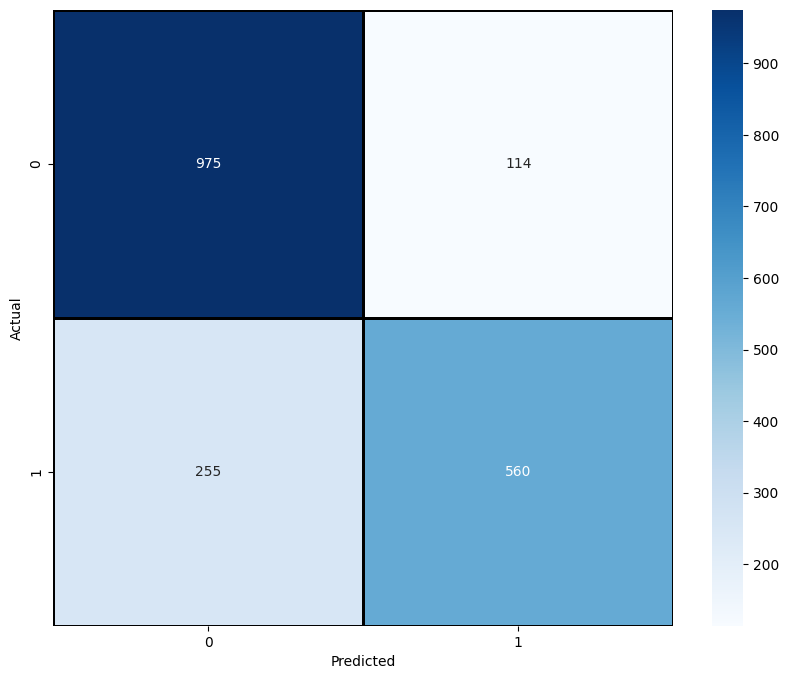

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = classifier.classes_, 
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [111]:
# accuracy score on the test data
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='log', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy score of the test data : {test_data_accuracy}\n')
print(classification_report(y_test,y_pred))
print(f1_score(y_test, y_pred, average='macro'))

Accuracy score of the test data : 0.7352941176470589

              precision    recall  f1-score   support

           0       0.69      0.98      0.81      1089
           1       0.94      0.41      0.57       815

    accuracy                           0.74      1904
   macro avg       0.82      0.69      0.69      1904
weighted avg       0.80      0.74      0.71      1904

0.6884942147107744


In [112]:
classifier

SGDClassifier(alpha=0.001, loss='log', max_iter=5, random_state=667, tol=None)

In [113]:
import joblib

joblib.dump(classifier, "SGD_sentiment.pkl")

['SGD_sentiment.pkl']

In [114]:
X = df.text
y = df.target

In [115]:
# Step 8: Pipeline Finale (nuovo train test split su dati raw tetuali)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )


from sklearn.pipeline import Pipeline

bow = CountVectorizer(max_features=3000, min_df=4, max_df=0.9)
tfidf = TfidfTransformer()
clf =SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=667, max_iter=10, tol=None)
#clf = classifier = MultinomialNB()

pipe = Pipeline([
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',clf),
                ])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7937828371278459


In [116]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84      1299
           1       0.89      0.60      0.71       985

    accuracy                           0.79      2284
   macro avg       0.82      0.77      0.78      2284
weighted avg       0.81      0.79      0.79      2284



Text(95.72222222222221, 0.5, 'Actual')

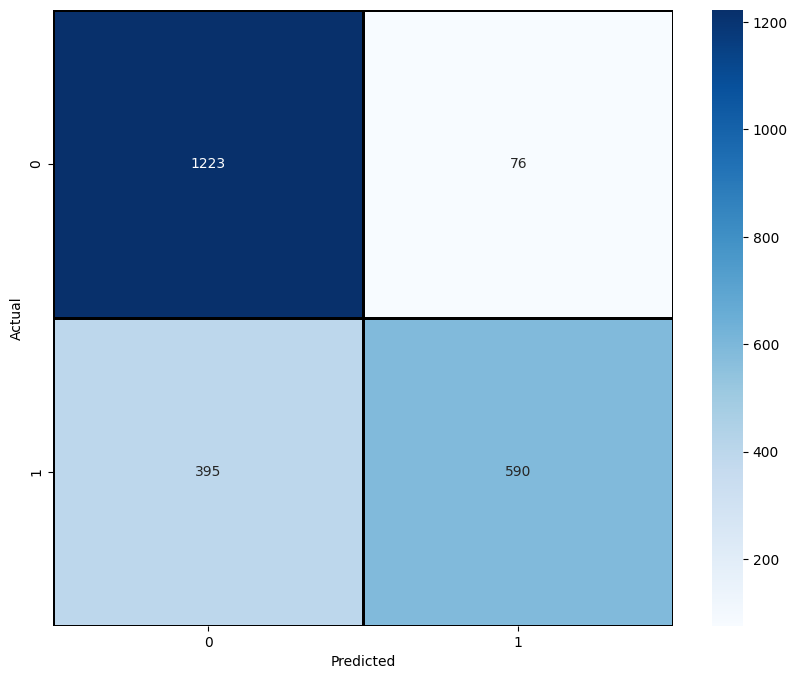

In [117]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = pipe.classes_, 
            yticklabels = pipe.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [118]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X, y, scoring = 'f1_micro', cv = 8)

print(f'scores={scores}')
print(f'mean={np.mean(scores)}')
print(f'std={np.std(scores)}')

scores=[0.75840336 0.66911765 0.69222689 0.63970588 0.64915966 0.72450053
 0.69610936 0.76971609]
mean=0.6998674272548135
std=0.044889891942417416


In [124]:
pred1 = pipe.predict(['ciao vez io vado al mare'])

In [126]:
pred1[0]

0

In [127]:
import joblib

joblib.dump(pipe, "SGD_twitter_pipe_sent.pkl")

['SGD_twitter_pipe_sent.pkl']